### Downloading and Unzip PTB-XL Dataset

In [ ]:
# !wget -r -N -c -np https://physionet.org/files/ptb-xl/1.0.3/

In [ ]:

# !wget https://physionet.org/static/published-projects/ptb-xl/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip "/content/"

In [ ]:
# !apt-get update && apt-get install zip -y

In [ ]:
# !unzip ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3.zip

### Installing & Importing Required Libraries

In [ ]:
# !pip install wfdb -q

In [ ]:
import pandas as pd
import numpy as np
import wfdb # Read a WFDB record, and return the physical signals
import ast

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Defining custom function(s)

In [ ]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

### Load Datasets

In [ ]:
path = '/content/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'
sampling_rate=100 # 100 Hz signal

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')#, nrows=2000)

# ast.literal_eval raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
a = wfdb.rdsamp(path+"records100/00000/00001_lr")

In [ ]:
a[0].shape

(1000, 12)

In [ ]:
a[1]

{'fs': 100,
 'sig_len': 1000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

In [ ]:
Y.head(1)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr


In [ ]:
# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

In [ ]:
X.shape

(21799, 1000, 12)

In [ ]:
X[0][0]

array([-0.119, -0.055,  0.064,  0.086, -0.091,  0.004, -0.069, -0.031,
        0.   , -0.026, -0.039, -0.079])

In [ ]:
agg_df = pd.read_csv(path+'scp_statements.csv')

In [ ]:
agg_df.head()

,Unnamed: 0,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
0,NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
1,NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
2,DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
3,LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
4,NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


In [ ]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [ ]:
agg_df.head(1)

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN


In [ ]:
Y.head(1)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr


In [ ]:
agg_df.diagnostic_class.unique()

array(['STTC', 'NORM', 'MI', 'HYP', 'CD'], dtype=object)

In [ ]:
agg_df.loc["NORM"]

description                           normal ECG
diagnostic                                   1.0
form                                         NaN
rhythm                                       NaN
diagnostic_class                            NORM
diagnostic_subclass                         NORM
Statement Category               Normal/abnormal
SCP-ECG Statement Description         normal ECG
AHA code                                     1.0
aECG REFID                                   NaN
CDISC Code                                   NaN
DICOM Code                               F-000B7
Name: NORM, dtype: object

### EDA & Feature Engineering

In [ ]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [ ]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [ ]:
Y.tail()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",LAD,NaN,NaN,1.0,False,True,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr,[STTC]
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",MID,Stadium II-III,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr,[NORM]
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,"{'ISCAS': 50.0, 'SR': 0.0}",MID,NaN,NaN,1.0,True,True,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr,[STTC]
21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,supraventrikulÄre extrasystole(n) sinusrhythmu...,"{'NORM': 100.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,SVES,NaN,8,records100/21000/21836_lr,records500/21000/21836_hr,[NORM]
21837,11744.0,68.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-11 16:43:01,sinusrhythmus p-sinistrocardiale lagetyp norma...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,", I-AVL,",NaN,NaN,NaN,NaN,9,records100/21000/21837_lr,records500/21000/21837_hr,[NORM]


In [ ]:
# Filter rows where 'diagnostic_superclass' has either no label or multiple labels
mask = Y['diagnostic_superclass'].apply(lambda x: len(x) == 1)

In [ ]:
mask

ecg_id
1        True
2        True
3        True
4        True
5        True
         ... 
21833    True
21834    True
21835    True
21836    True
21837    True
Name: diagnostic_superclass, Length: 21799, dtype: bool

In [ ]:
Y_filtered = Y[mask]

In [ ]:
# Now, you should also filter the raw signal data 'X' to match the updated labels
X_filtered = X[mask]

In [ ]:
X_filtered.shape, Y_filtered.shape

((16244, 1000, 12), (16244, 28))

In [ ]:
Y_filtered.head(2)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]


In [ ]:
Y_filtered.strat_fold.unique()

array([ 3,  2,  5,  4,  7,  9, 10,  8,  6,  1])

In [ ]:
X_filtered.shape

(16244, 1000, 12)

In [ ]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with a column of unique numbers from 1 to 10
data = {'Column': [1, 2, 3, 4, 5, 6, 7, 2, 9, 3]}
df = pd.DataFrame(data)

# Define the values to exclude
exclude_values = [2, 3]

In [ ]:
~df['Column'].isin(exclude_values)

0     True
1    False
2    False
3     True
4     True
5     True
6     True
7    False
8     True
9    False
Name: Column, dtype: bool

In [ ]:
df_array = df.to_numpy()

In [ ]:
df_array[np.where(~df['Column'].isin(exclude_values))]

array([[1],
       [4],
       [5],
       [6],
       [7],
       [9]])

In [ ]:
np.where(~Y_filtered.strat_fold.isin([2, 3]))

(array([    2,     4,     5, ..., 16240, 16242, 16243]),)

In [ ]:
exclude_train_fold = [2, 3]
np.where(~Y_filtered.strat_fold.isin(exclude_train_fold))

(array([    2,     4,     5, ..., 16240, 16242, 16243]),)

In [ ]:
(~Y_filtered.strat_fold.isin(exclude_train_fold))

ecg_id
1        False
2        False
3         True
4        False
5         True
         ...  
21833     True
21834     True
21835    False
21836     True
21837     True
Name: strat_fold, Length: 16244, dtype: bool

### Split Dataset into Train, Val & Test datasets

In [ ]:
# Continue to split data into train and test
exclude_train_fold = [3, 10]
test_fold = 10
final_test_fold = 3

# Train
X_train = X_filtered[np.where(~Y_filtered.strat_fold.isin(exclude_train_fold))]
y_train = Y_filtered[(~Y_filtered.strat_fold.isin(exclude_train_fold))].diagnostic_superclass

# Validation
X_final_test = X_filtered[np.where(Y_filtered.strat_fold == final_test_fold)]
y_final_test = Y_filtered[Y_filtered.strat_fold == final_test_fold].diagnostic_superclass

# Test
X_test = X_filtered[np.where(Y_filtered.strat_fold == test_fold)]
y_test = Y_filtered[Y_filtered.strat_fold == test_fold].diagnostic_superclass

# To simplify y_train and y_test further, convert the list entries to single string labels
y_train = y_train.apply(lambda x: x[0])
y_final_test = y_final_test.apply(lambda x: x[0])
y_test = y_test.apply(lambda x: x[0])

In [ ]:
y_train.value_counts()

NORM    7216
MI      2047
STTC    1924
CD      1363
HYP      424
Name: diagnostic_superclass, dtype: int64

In [ ]:
y_final_test.value_counts()

NORM    941
STTC    234
MI      229
CD      161
HYP      55
Name: diagnostic_superclass, dtype: int64

In [ ]:
y_test.value_counts()

NORM    912
MI      256
STTC    242
CD      184
HYP      56
Name: diagnostic_superclass, dtype: int64

In [ ]:
X[0].T.shape

(12, 1000)

In [ ]:
X[0].T[1].min(), X[0].T[1].max()

(-0.14, 0.435)

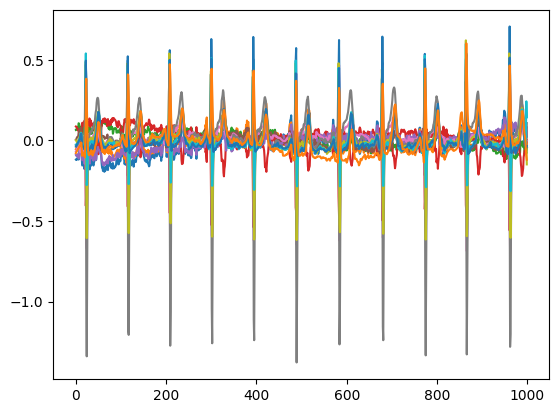

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X[0].T[0]);
plt.plot(X[0].T[1]);
plt.plot(X[0].T[2]);
plt.plot(X[0].T[3]);
plt.plot(X[0].T[4]);
plt.plot(X[0].T[5]);
plt.plot(X[0].T[6]);
plt.plot(X[0].T[7]);
plt.plot(X[0].T[8]);
plt.plot(X[0].T[9]);
plt.plot(X[0].T[10]);
plt.plot(X[0].T[11]);

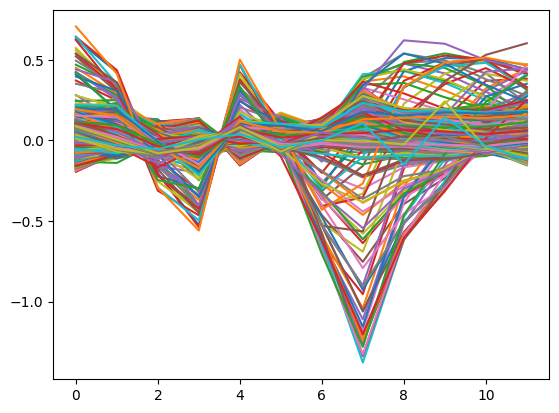

In [ ]:
plt.plot(X[0].T);

5
(1000, 12)


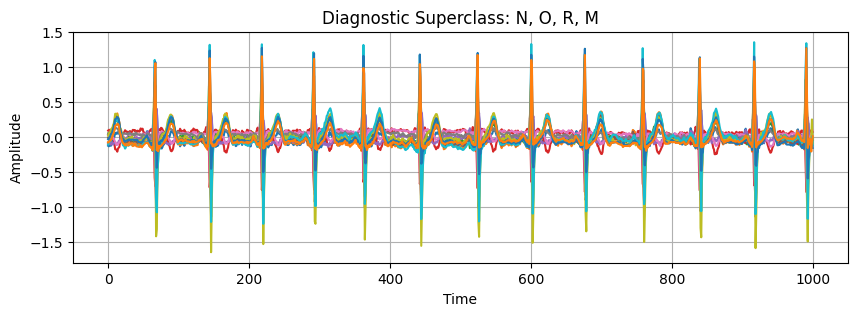

(1000, 12)


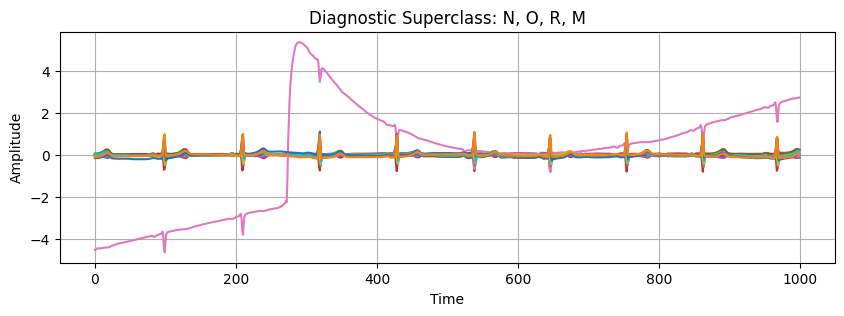

(1000, 12)


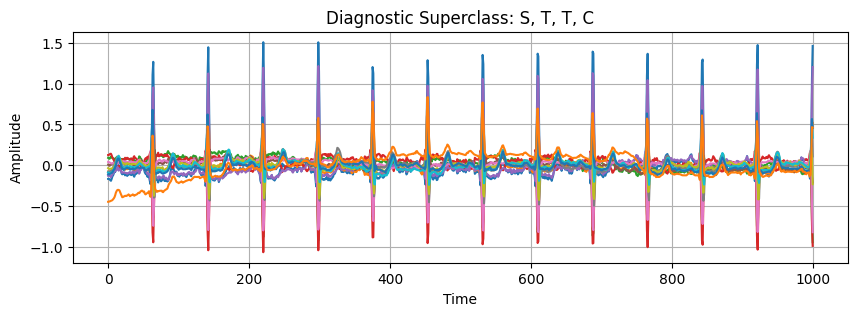

(1000, 12)


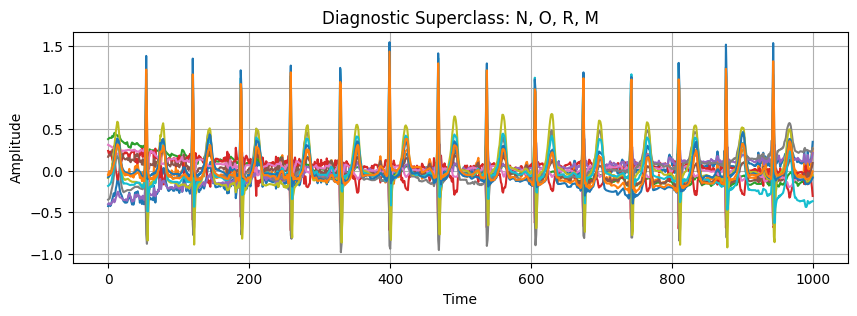

(1000, 12)


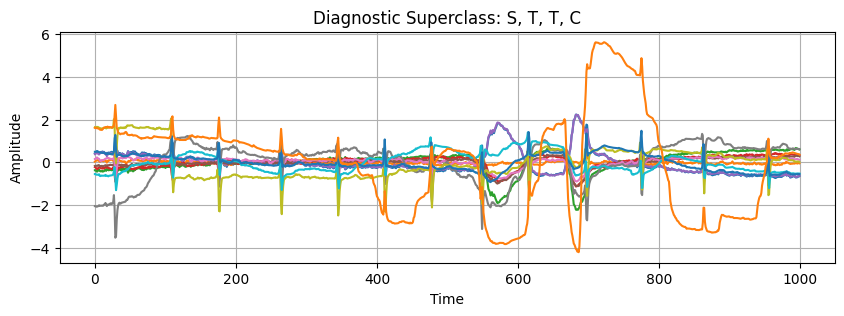

In [ ]:
import matplotlib.pyplot as plt

def plot_ecg_examples(X, Y, num_examples=5):
    # Randomly select some examples
    idx = np.random.choice(np.arange(len(X)), num_examples, replace=False)
    print(len(idx))
    for i in idx:
        print(X[i].shape)
        plt.figure(figsize=(10, 3))
        # (x, y) -> (signal, channels)
        plt.plot(X[i])  # If your ECG data has multiple channels, they'll all be plotted.
        plt.title(f"Diagnostic Superclass: {', '.join(Y.iloc[i])}")
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

# To visualize 5 random examples from the training set:
plot_ecg_examples(X_train, y_train, num_examples=5)


In [ ]:
X_train.shape, y_train.shape

((14594, 1000, 12), (14594,))

In [ ]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
X[0].shape[1]

12

In [ ]:
X[0][0]

array([-0.119, -0.055,  0.064,  0.086, -0.091,  0.004, -0.069, -0.031,
        0.   , -0.026, -0.039, -0.079])

(1000, 12)


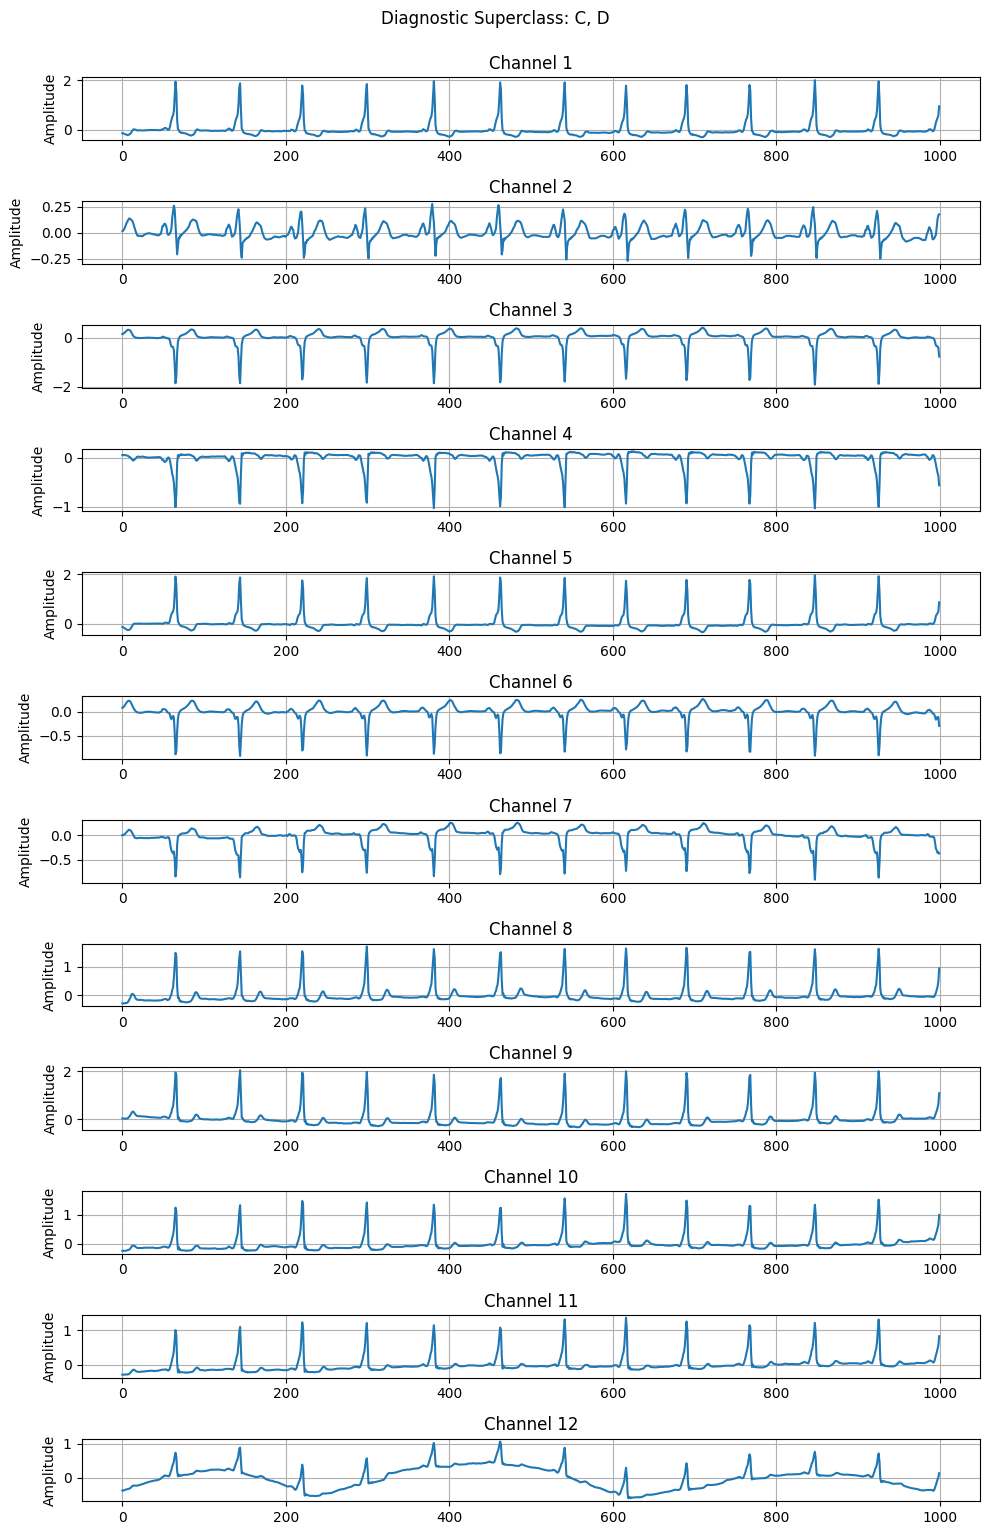

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_single_ecg_example(X, Y):
    # Randomly select one example
    idx = np.random.choice(np.arange(len(X)))

    sample_ecg = X[idx]
    label = Y.iloc[idx]
    print(sample_ecg.shape)

    # Create a 12x1 grid of plots
    fig, axs = plt.subplots(nrows=12, ncols=1, figsize=(10, 15))

    for i in range(12):
        # print(sample_ecg[i].shape)
        sns.lineplot(x=np.arange(sample_ecg.shape[0]), y=sample_ecg[:, i], ax=axs[i])
        axs[i].set_title(f"Channel {i+1}")
        axs[i].set_ylabel('Amplitude')
        axs[i].grid(True)

    plt.tight_layout()
    plt.suptitle(f"Diagnostic Superclass: {', '.join(label)}", y=1.02)
    plt.show()

# To visualize a random example from the training set:
plot_single_ecg_example(X_train, y_train)

In [ ]:
y_train

ecg_id
2        NORM
3        NORM
5        NORM
6        NORM
7        NORM
         ... 
21833    STTC
21834    NORM
21835    STTC
21836    NORM
21837    NORM
Name: diagnostic_superclass, Length: 12974, dtype: object

In [ ]:
y_final_test

ecg_id
1        NORM
4        NORM
15       NORM
24       NORM
33       NORM
         ... 
21761      CD
21793      MI
21816    STTC
21823    NORM
21825    NORM
Name: diagnostic_superclass, Length: 1620, dtype: object

### Encode Categorical Features

In [ ]:
X_train = np.array(X_train)
X_final_test = np.array(X_final_test)
X_test = np.array(X_test)

# If y_train and y_test are lists of labels, convert them to categorical format
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Combine train and test labels
all_labels = pd.concat([y_train, y_test])

# Fit on combined labels
le.fit(all_labels)

# Transform separately
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

In [ ]:
le.classes_

array(['CD', 'HYP', 'MI', 'NORM', 'STTC'], dtype=object)

In [ ]:
y_train_cat

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
# Unique labels and their counts in the training set
train_label_counts = y_train.value_counts()

# Unique labels and their counts in the test set
test_label_counts = y_test.value_counts()

print("Training Labels:")
print(train_label_counts)

print("\nTest Labels:")
print(test_label_counts)

Training Labels:
NORM    7216
MI      2047
STTC    1924
CD      1363
HYP      424
Name: diagnostic_superclass, dtype: int64

Test Labels:
NORM    912
MI      256
STTC    242
CD      184
HYP      56
Name: diagnostic_superclass, dtype: int64


In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (number_of_time_points, 12)
input_shape

(1000, 12)

In [ ]:
y_train.shape, y_test.shape

((12974,), (1650,))

### Save processed datasets

In [ ]:
with open('ecg_x_train_exclude_fold_3_10.npy', 'wb') as f:
    np.save(f, X_train)
with open('ecg_y_train_exclude_fold_3_10.npy', 'wb') as f:
    np.save(f, y_train_cat)
with open('ecg_x_test_fold_10.npy', 'wb') as f:
    np.save(f, X_test)
with open('ecg_y_test_fold_10.npy', 'wb') as f:
    np.save(f, y_test_cat)
with open('ecg_x_final_test_fold_3.npy', 'wb') as f:
    np.save(f, X_final_test)
with open('ecg_y_final_test_fold_3.npy', 'wb') as f:
    np.save(f, y_final_test)

In [ ]:
y_train_cat.shape

(14594, 5)

In [ ]:
# !cp ecg_x_train_exclude_fold_3_10.npy ecg_y_train_exclude_fold_3_10.npy ecg_x_test_fold_10.npy ecg_y_test_fold_10.npy ecg_x_final_test_fold_3.npy ecg_y_final_test_fold_3.npy "/content/gdrive/MyDrive/"